In [1]:
import fingerprint
import cv2
import numpy as np
import matplotlib.pyplot as plt

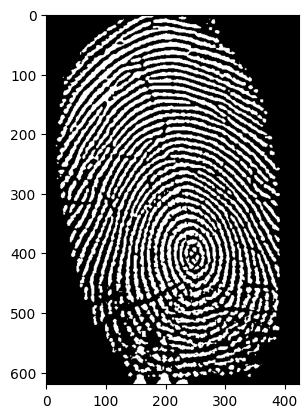

In [4]:
from skimage.util import invert

# Binarizing finger print image
original_img = cv2.imread("images/print1.png", cv2.IMREAD_ANYCOLOR)
BnW_image = fingerprint.BinarizeFingerprint(original_img, method='Pixel Blocks Optimized', blockSize=15)
BnW_image = invert(BnW_image)

# Plotting
plt.imshow(BnW_image, cmap='gray')
plt.show()

In [5]:
points = fingerprint.ToPointCloud(BnW_image)

#plotting
from gtda.plotting import plot_point_cloud
plot_point_cloud(points[0])

In [6]:
from gtda.homology import VietorisRipsPersistence

# Track connected components, loops, and voids
homology_dimensions = [0, 1, 2]

# Collapse edges to speed up H2 persistence calculation!
persistence = VietorisRipsPersistence(
    metric="euclidean",
    homology_dimensions=homology_dimensions,
    n_jobs=6,
    collapse_edges=True,
)

diagrams_basic = persistence.fit_transform(points)

In [ ]:
from gtda.plotting import plot_diagram

plot_diagram(diagrams_basic[0])